In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

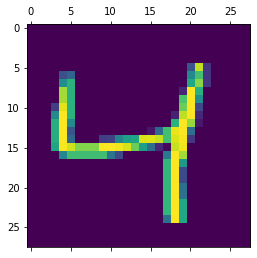

In [6]:
plt.matshow(X_train[2])

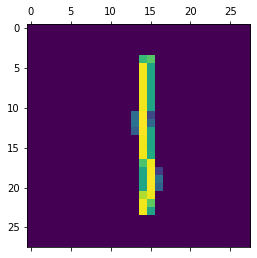

In [7]:
plt.matshow(X_train[1002])

In [8]:
X_train.shape
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.4874 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.3058 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.2855 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 868us/step - loss: 0.2748 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.2677 - accuracy: 0.9259


In [11]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 627us/step - loss: 0.2654 - accuracy: 0.9262


[0.2653626501560211, 0.9261999726295471]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([2.5767088e-04, 1.1122013e-06, 5.7236928e-01, 1.7619133e-04,
       6.1911014e-14, 1.1534691e-03, 1.7992258e-03, 2.8210922e-16,
       3.8318249e-05, 4.5331130e-13], dtype=float32)

In [13]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
#trying another model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2820 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1297 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0741 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0490 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.024

In [15]:
#one more
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10)

TypeError: 'int' object is not iterable